In [1]:
import pandas as pd
# Relative path example
file_path = '../Data/Credit_2007.csv'
df = pd.read_csv(file_path)
df.head()

,ID,YEAR,MONTH,DOB,Gender,Marital_Status,Nbr_Children,Occupation,Home,Mo_Expenses,Mo_Income,Checking_Account,Savings_Account,Credit_limit,Account_Status,Mo_Balance
0,1,2007,12,19/07/1926,Female,Married,2,Administrative,Own,562,1606,No,Yes,high,Balanced,1044
1,6,2007,12,03/12/1925,Female,Married,1,Administrative,Own,515,1908,No,Yes,high,60 days late,1393
2,7,2007,12,03/06/1926,Male,Married,1,Administrative,Own,579,1655,No,No,low,60 days late,1076
3,10,2007,12,03/03/1922,Male,Single,1,Manager,Rent,627,3293,No,Yes,high,30 days late,2666
4,11,2007,12,19/11/1916,Female,Married,1,Administrative,Own,529,1265,No,Yes,high,30 days late,736


In [2]:
print(df.shape)
#got the dimensions of the data

(282, 16)


In [3]:
print(df.describe())

               ID    YEAR  MONTH  Nbr_Children  Mo_Expenses    Mo_Income  \
count  282.000000   282.0  282.0    282.000000   282.000000   282.000000   
mean   223.921986  2007.0   12.0      1.539007   750.212766  2447.624113   
std    115.943020     0.0    0.0      0.553446   358.949710  1041.518707   
min      1.000000  2007.0   12.0      1.000000   257.000000  1002.000000   
25%    126.750000  2007.0   12.0      1.000000   455.250000  1523.000000   
50%    241.500000  2007.0   12.0      2.000000   630.500000  2170.000000   
75%    321.750000  2007.0   12.0      2.000000  1016.000000  3390.000000   
max    407.000000  2007.0   12.0      3.000000  1771.000000  4427.000000   

        Mo_Balance  
count   282.000000  
mean   1697.411348  
std     755.298235  
min     513.000000  
25%    1020.750000  
50%    1516.000000  
75%    2341.000000  
max    3299.000000  


In [4]:
print(df['Credit_limit'].value_counts())

Credit_limit
high         138
low           53
very low      46
mid-level     45
Name: count, dtype: int64


In [5]:
print(df['Marital_Status'].value_counts())

Marital_Status
Married    226
Single      39
Widowed     17
Name: count, dtype: int64


In [6]:
color_map = {"high" : 3,"low" : 1, "very low" : 0, "mid-level" : 2}
df["Credit_Limit"] = df["Credit_limit"].map(color_map)

In [7]:
df.head()

,ID,YEAR,MONTH,DOB,Gender,Marital_Status,Nbr_Children,Occupation,Home,Mo_Expenses,Mo_Income,Checking_Account,Savings_Account,Credit_limit,Account_Status,Mo_Balance,Credit_Limit
0,1,2007,12,19/07/1926,Female,Married,2,Administrative,Own,562,1606,No,Yes,high,Balanced,1044,3
1,6,2007,12,03/12/1925,Female,Married,1,Administrative,Own,515,1908,No,Yes,high,60 days late,1393,3
2,7,2007,12,03/06/1926,Male,Married,1,Administrative,Own,579,1655,No,No,low,60 days late,1076,1
3,10,2007,12,03/03/1922,Male,Single,1,Manager,Rent,627,3293,No,Yes,high,30 days late,2666,3
4,11,2007,12,19/11/1916,Female,Married,1,Administrative,Own,529,1265,No,Yes,high,30 days late,736,3


In [8]:
print(df.isnull().sum())
#check for missing values

ID                  0
YEAR                0
MONTH               0
DOB                 0
Gender              0
Marital_Status      0
Nbr_Children        0
Occupation          0
Home                0
Mo_Expenses         0
Mo_Income           0
Checking_Account    0
Savings_Account     0
Credit_limit        0
Account_Status      0
Mo_Balance          0
Credit_Limit        0
dtype: int64


In [9]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


<Axes: >

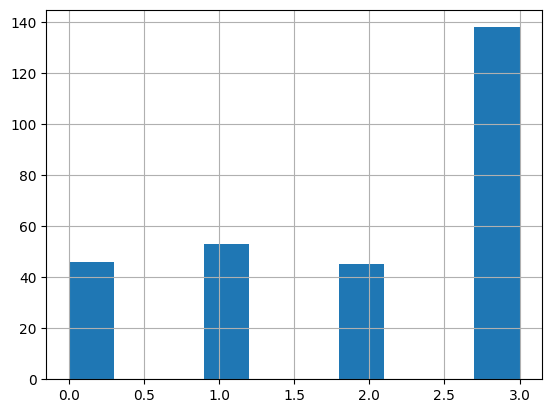

In [10]:
df['Credit_Limit'].hist()
#makes a histogram for numerical colunm

<Axes: >

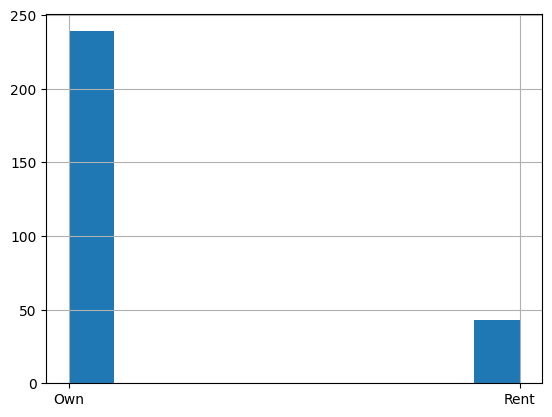

In [11]:
df['Home'].hist()
#makes a histogram for numerical colunm

<Axes: >

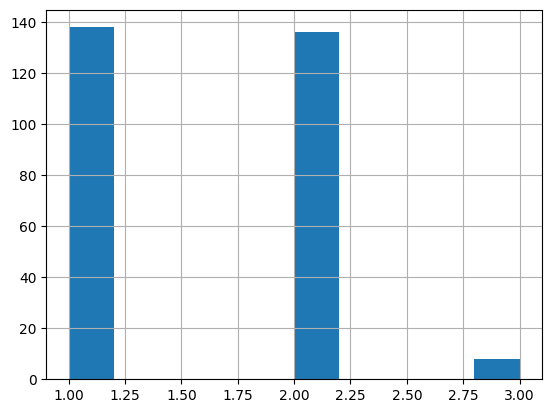

In [12]:
df['Nbr_Children'].hist()
#makes a histogram for numerical colunm

<Axes: xlabel='Credit_limit'>

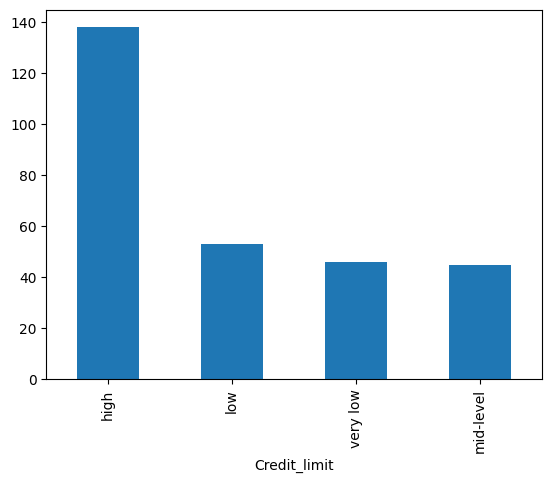

In [13]:
df['Credit_limit'].value_counts().plot(kind='bar')

<Axes: xlabel='Credit_Limit', ylabel='Mo_Income'>

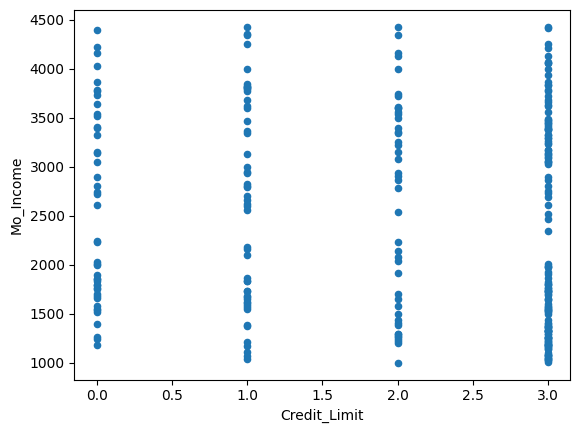

In [14]:
#multivariate analysis
#find relationship between colunms
df.plot.scatter(x='Credit_Limit', y='Mo_Income')


<Axes: xlabel='Mo_Expenses', ylabel='Mo_Income'>

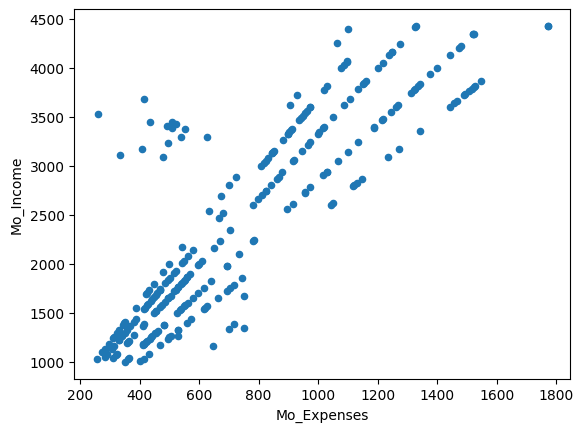

In [15]:
#multivariate analysis
#find relationship between colunms
df.plot.scatter(x='Mo_Expenses', y='Mo_Income')


In [16]:
non_numeric_columns = df.select_dtypes(include=['int']).columns
print("Non-numeric columns:", non_numeric_columns)
for col in non_numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
dp =  df.select_dtypes(include=['int'])
print(dp)

Non-numeric columns: Index(['ID', 'YEAR', 'MONTH', 'Nbr_Children', 'Mo_Expenses', 'Mo_Income',
       'Mo_Balance', 'Credit_Limit'],
      dtype='object')
      ID  YEAR  MONTH  Nbr_Children  Mo_Expenses  Mo_Income  Mo_Balance  \
0      1  2007     12             2          562       1606        1044   
1      6  2007     12             1          515       1908        1393   
2      7  2007     12             1          579       1655        1076   
3     10  2007     12             1          627       3293        2666   
4     11  2007     12             1          529       1265         736   
..   ...   ...    ...           ...          ...        ...         ...   
277  401  2007     12             1          744       1861        1117   
278  402  2007     12             1          501       1856        1355   
279  404  2007     12             1          750       1675         925   
280  406  2007     12             2          474       1579        1105   
281  407  2007     1

In [17]:
import numpy as np
corr_matrix = dp.corr()
print(corr_matrix)
#compute and visualize the co-relation matrix
#use only numeric colunms

                    ID  YEAR  MONTH  Nbr_Children  Mo_Expenses  Mo_Income  \
ID            1.000000   NaN    NaN      0.021843     0.477766   0.390184   
YEAR               NaN   NaN    NaN           NaN          NaN        NaN   
MONTH              NaN   NaN    NaN           NaN          NaN        NaN   
Nbr_Children  0.021843   NaN    NaN      1.000000    -0.070067  -0.015767   
Mo_Expenses   0.477766   NaN    NaN     -0.070067     1.000000   0.860139   
Mo_Income     0.390184   NaN    NaN     -0.015767     0.860139   1.000000   
Mo_Balance    0.310989   NaN    NaN      0.011557     0.710846   0.970176   
Credit_Limit -0.385072   NaN    NaN     -0.056938    -0.164915  -0.121514   

              Mo_Balance  Credit_Limit  
ID              0.310989     -0.385072  
YEAR                 NaN           NaN  
MONTH                NaN           NaN  
Nbr_Children    0.011557     -0.056938  
Mo_Expenses     0.710846     -0.164915  
Mo_Income       0.970176     -0.121514  
Mo_Balance      1.0

In [33]:
del df["ID"]
print(df)

            DOB  Gender Marital_Status  Nbr_Children      Occupation  Home  \
0    19/07/1926  Female        Married             2  Administrative   Own   
1    03/12/1925  Female        Married             1  Administrative   Own   
2    03/06/1926    Male        Married             1  Administrative   Own   
3    03/03/1922    Male         Single             1         Manager  Rent   
4    19/11/1916  Female        Married             1  Administrative   Own   
..          ...     ...            ...           ...             ...   ...   
277  19/08/1930    Male        Married             1    Professional   Own   
278  19/06/1913    Male        Widowed             1         Skilled   Own   
279  15/08/1919  Female        Married             1  Administrative   Own   
280  19/09/1918    Male        Married             2  Administrative   Own   
281  19/09/1919    Male        Married             1  Administrative   Own   

     Mo_Expenses  Mo_Income Checking_Account Savings_Account Cr

In [34]:
non_numeric_columns = df.select_dtypes(include=['int']).columns
print("Non-numeric columns:", non_numeric_columns)
for col in non_numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
dp =  df.select_dtypes(include=['int'])
print(dp)

Non-numeric columns: Index(['Nbr_Children', 'Mo_Expenses', 'Mo_Income', 'Mo_Balance',
       'Credit_Limit'],
      dtype='object')
     Nbr_Children  Mo_Expenses  Mo_Income  Mo_Balance  Credit_Limit
0               2          562       1606        1044             3
1               1          515       1908        1393             3
2               1          579       1655        1076             1
3               1          627       3293        2666             3
4               1          529       1265         736             3
..            ...          ...        ...         ...           ...
277             1          744       1861        1117             0
278             1          501       1856        1355             0
279             1          750       1675         925             1
280             2          474       1579        1105             0
281             1          543       1810        1267             3

[282 rows x 5 columns]


In [35]:
import numpy as np
corr_matrix = dp.corr()
print(corr_matrix)
#compute and visualize the co-relation matrix
#use only numeric colunms

              Nbr_Children  Mo_Expenses  Mo_Income  Mo_Balance  Credit_Limit
Nbr_Children      1.000000    -0.070067  -0.015767    0.011557     -0.056938
Mo_Expenses      -0.070067     1.000000   0.860139    0.710846     -0.164915
Mo_Income        -0.015767     0.860139   1.000000    0.970176     -0.121514
Mo_Balance        0.011557     0.710846   0.970176    1.000000     -0.089188
Credit_Limit     -0.056938    -0.164915  -0.121514   -0.089188      1.000000


In [39]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


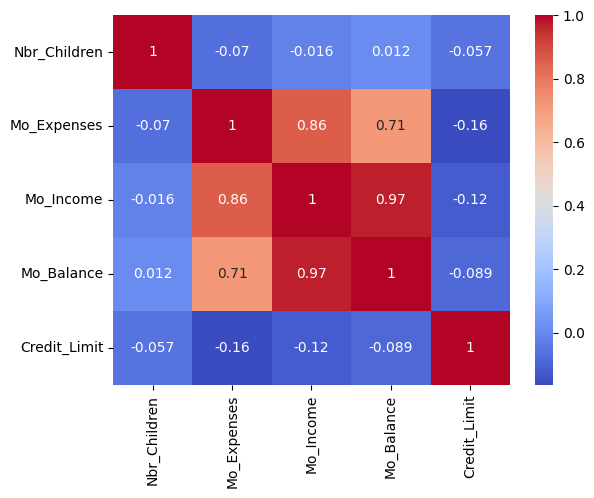

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
#visualize the numeric(int) data using heat map
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


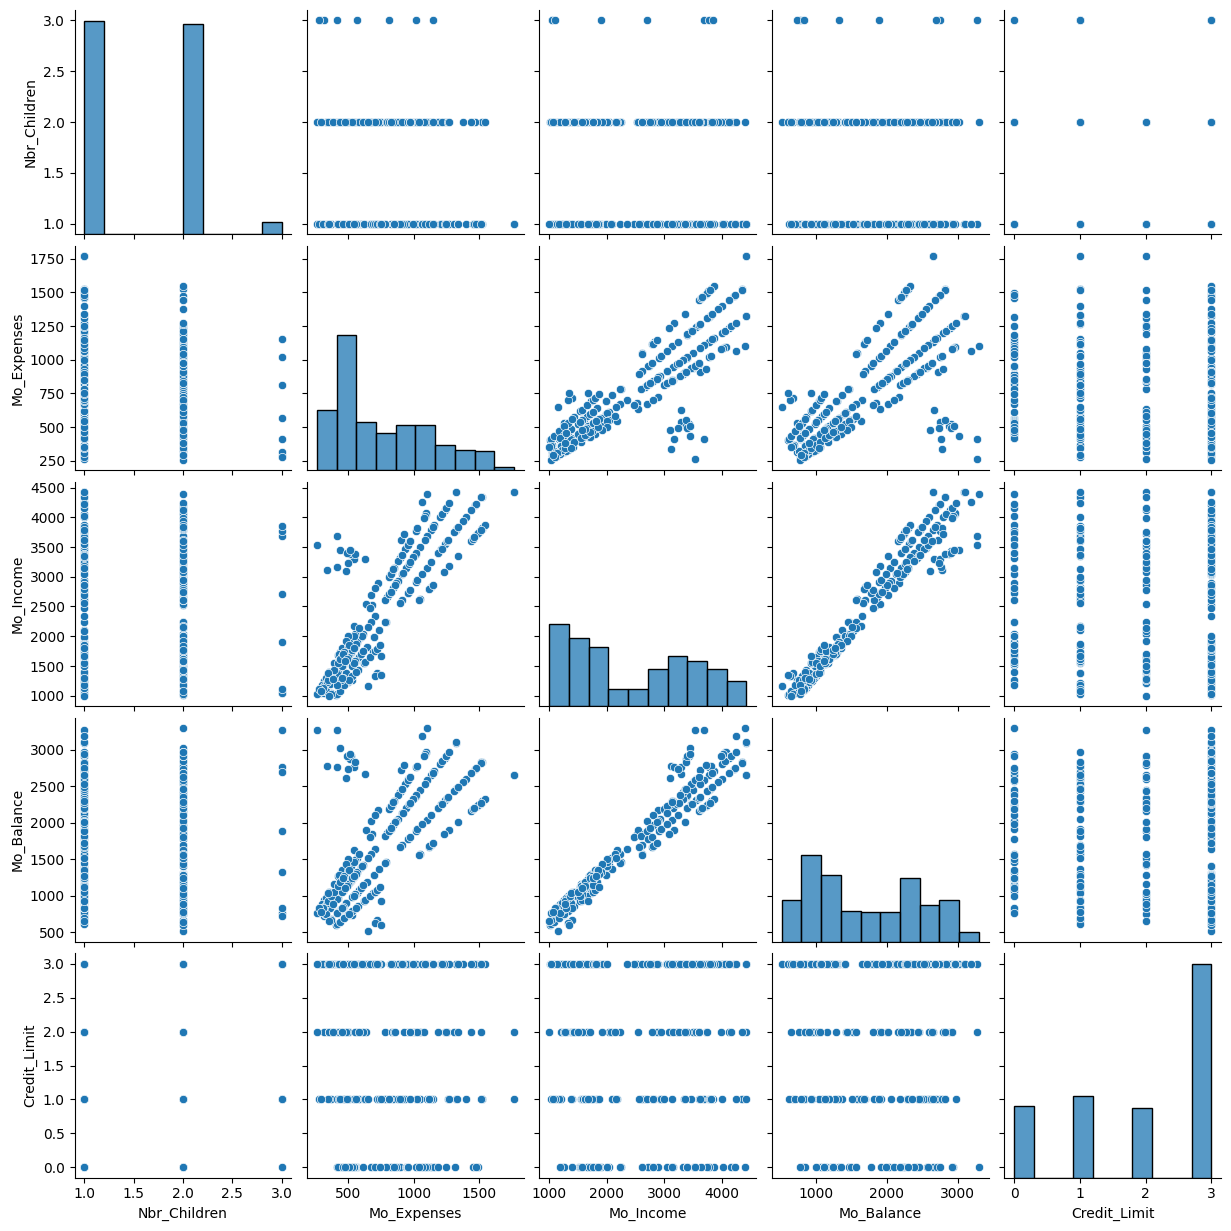

In [43]:
sns.pairplot(dp)
plt.show()
#explore pairwise relationships

In [ ]:
sns.pairplot(df)
plt.show()
#explore pairwise relationships